## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [27]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [28]:
train, test = keras.datasets.cifar10.load_data()

In [29]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [30]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [34]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(input_layer)
            x = keras.layers.Dropout(rate=drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(x)
            x = keras.layers.Dropout(rate=drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [37]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95

Dropout_EXP = [0.1, 0.25, 0.5]

In [38]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for DE in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=DE)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(DE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 7s 146us/step - loss: 1.6714 - acc: 0.3988 - val_loss: 1.5607 - val_acc: 0.4516
Epoch 10/30
50000/50000 [==============================] - 7s 141us/step - loss: 1.6515 - acc: 0.4050 - val_loss: 1.5831 - val_acc: 0.4390
Epoch 11/30
50000/50000 [==============================] - 7s 146us/step - loss: 1.6448 - acc: 0.4076 - val_loss: 1.5690 - val_acc: 0.4478
Epoch 12/30
50000/50000 [==============================] - 7s 144us/step - loss: 1.6314 - acc: 0.4118 - val_loss: 1.5461 - val_acc: 0.4496
Epoch 13/30
50000/50000 [==============================] - 7s 145us/step - loss: 1.6257 - acc: 0.4122 - val_loss: 1.5786 - val_acc: 0.4440
Epoch 14/30
50000/50000 [==============================] - 7s 147us/step - loss: 1.6120 - acc: 0.4208 - val_loss: 1.5439 - val_acc: 0.4558
Epoch 15/30
50000/50000 [==============================] - 7s 142us/step - loss: 1.6079 - acc: 0.4213 - val_loss: 1.5301 - val_acc: 0.4592
Epoch 16/30
50000/50000 [==============

50000/50000 [==============================] - 7s 139us/step - loss: 1.9512 - acc: 0.2655 - val_loss: 1.9379 - val_acc: 0.3030
Epoch 28/30
50000/50000 [==============================] - 7s 141us/step - loss: 1.9318 - acc: 0.2716 - val_loss: 1.9183 - val_acc: 0.3056
Epoch 29/30
50000/50000 [==============================] - 8s 162us/step - loss: 1.9280 - acc: 0.2742 - val_loss: 1.9050 - val_acc: 0.3219
Epoch 30/30
50000/50000 [==============================] - 9s 177us/step - loss: 1.9320 - acc: 0.2709 - val_loss: 1.9611 - val_acc: 0.2902


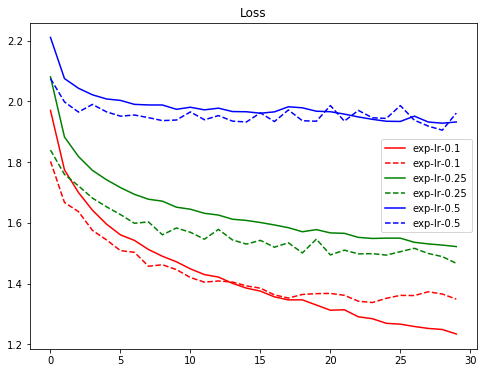

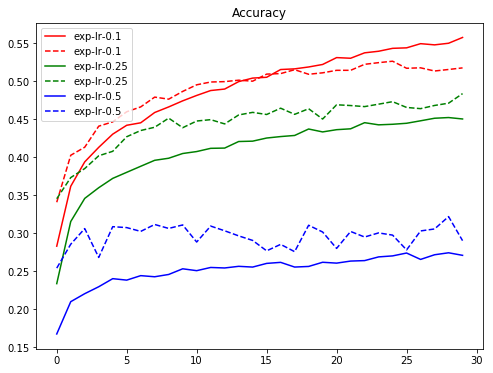

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()